**FORMULA1**


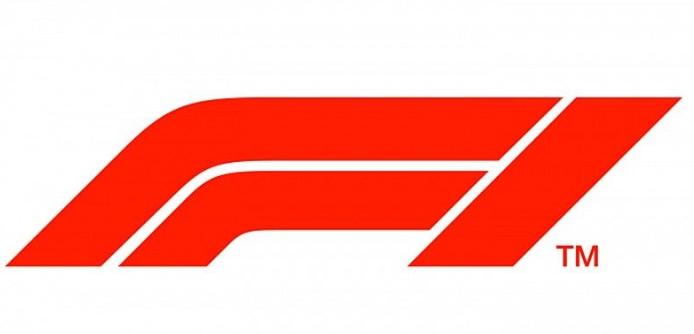

In [ ]:
# Run this cell and select the kaggle.json file downloaded from tha Kaggle account settings page
from google.colab import files
files.upload()

In [ ]:
# Nexxt install the Kaggle API client.
!pip install -q kaggle

In [ ]:
#The Kaggle API client expects this file to be in ~/.kaggle, so move it there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#This permission change avoids a warning on Kaggşe tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#Creating directory and changing the current working directory
!mkdir f1_statistic_dataset
%cd f1_statistic_dataset

mkdir: cannot create directory ‘f1_statistic_dataset’: File exists
/f1_statistic_dataset


In [ ]:
# Downloading dataset and coming out of directory
!kaggle datasets download rohanrao/formula-1-world-championship-1950-2020
%cd ..


Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
License(s): CC0-1.0
formula-1-world-championship-1950-2020.zip: Skipping, found more recently modified local copy (use --force to force download)
/


In [ ]:
!unzip f1_statistic_dataset/formula-1-world-championship-1950-2020.zip -d f1_statistic_dataset
!rm f1_statistic_dataset/formula-1-world-championship-1950-2020.zip


Archive:  f1_statistic_dataset/formula-1-world-championship-1950-2020.zip
  inflating: f1_statistic_dataset/circuits.csv  
  inflating: f1_statistic_dataset/constructor_results.csv  
  inflating: f1_statistic_dataset/constructor_standings.csv  
  inflating: f1_statistic_dataset/constructors.csv  
  inflating: f1_statistic_dataset/driver_standings.csv  
  inflating: f1_statistic_dataset/drivers.csv  
  inflating: f1_statistic_dataset/lap_times.csv  
  inflating: f1_statistic_dataset/pit_stops.csv  
  inflating: f1_statistic_dataset/qualifying.csv  
  inflating: f1_statistic_dataset/races.csv  
  inflating: f1_statistic_dataset/results.csv  
  inflating: f1_statistic_dataset/seasons.csv  
  inflating: f1_statistic_dataset/sprint_results.csv  
  inflating: f1_statistic_dataset/status.csv  


In [ ]:
# importing required libraries
import kagglehub
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

**Importing The Data**



In [ ]:
result_df = pd.read_csv('/f1_statistic_dataset/results.csv')
stats_df = pd.read_csv('/f1_statistic_dataset/status.csv')
drivers_df = pd.read_csv('/f1_statistic_dataset/drivers.csv')
races_df = pd.read_csv('/f1_statistic_dataset/races.csv')
constructor_df = pd.read_csv('/f1_statistic_dataset/constructors.csv')
driver_standings_df = pd.read_csv('/f1_statistic_dataset/driver_standings.csv')
pd.get_option("display.max_columns",None)


In [ ]:
result_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
stats_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [ ]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
constructor_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [ ]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


**Feature Engineering**

In [ ]:
races_df['raceId']

,raceId
0,1
1,2
2,3
3,4
4,5
...,...
1120,1140
1121,1141
1122,1142
1123,1143


In [ ]:
races_df = races_df.raceId.astype(int)

In [ ]:
#merging all seperate dataframe into single dataframe as df

con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
df = pd.merge(con4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()


,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [ ]:
#checking of null values

df.isna().sum()

,0
resultId,0
raceId_x,0
driverId,0
constructorId,0
number_x,0
grid,0
position_x,0
positionText_x,0
positionOrder,0
points_x,0


There is no null values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677131 entries, 0 to 3677130
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time               object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  driverRef          object 
 19  number_y           object 
 20  code               object 
 21  forename           object 
 22  surname            object 
 23  dob                object 
 24  nationality_x      object 
 25  url_x             

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3677131.0,13084.400676,8411.234839,1.0,5372.0,12269.0,21666.0,26524.0
raceId_x,3677131.0,536.664477,342.035595,1.0,244.0,485.0,878.0,1132.0
driverId,3677131.0,220.855478,282.118071,1.0,20.0,105.0,243.0,860.0
constructorId,3677131.0,41.025966,58.766532,1.0,6.0,16.0,42.0,215.0
grid,3677131.0,9.741389,6.524203,0.0,4.0,9.0,15.0,34.0
positionOrder,3677131.0,11.173583,7.331857,1.0,5.0,10.0,17.0,39.0
points_x,3677131.0,3.105262,5.456179,0.0,0.0,0.0,4.0,50.0
laps,3677131.0,48.609987,24.890440,0.0,34.0,55.0,67.0,200.0
statusId,3677131.0,13.042926,22.510783,1.0,1.0,5.0,11.0,141.0
driverStandingsId,3677131.0,41228.044725,25521.150447,1.0,15905.0,52775.0,66558.0,72871.0


In [ ]:
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [ ]:
# droping unwanted columns
df = df.drop(columns=['url_y','url_x','position_x','fastestLapTime','positionText_x','time','driverRef',
              'constructorRef','nationality_y','positionText_y','raceId_y','points_y'], axis=1)

In [ ]:
# changing of old column name to meaningful name

col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,forename,surname,dob,nationality,driverStandingsId,position,wins,name,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


In [ ]:
# Adding two column (forename,surname) to create a single column called driver_name

df['driver_name'] = df['forename']+' '+df['surname']

In [ ]:
df = df.drop(['forename','surname'],axis=1)

**Converting Dtype**

In [ ]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton


In [ ]:
pd.to_datetime(df.dob)

,dob
0,1985-01-07
1,1985-01-07
2,1985-01-07
3,1985-01-07
4,1985-01-07
...,...
3677126,1996-02-07
3677127,1996-02-07
3677128,1996-02-07
3677129,1996-02-07


In [ ]:
df['dob'] = pd.to_datetime(df['dob'])

In [ ]:
from datetime import datetime

In [ ]:
# calculating driver's age and creating it as a new column

dates = datetime.today()-df['dob']
age = dates.dt.days/365

In [ ]:
df['age'] = round(age)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,40.0


In [ ]:
# changing datatype

l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [ ]:
df.drop('driver_num',axis=1,inplace=True)

In [ ]:
#seperating categorical and numerical columns for understanding

cat = []
num= []

for i in df.columns:
  if df[i].dtypes == 'O':
    cat.append(i)
  else:
    num.append(i)

In [ ]:
df[cat].head()

,driver_code,nationality,name,status,driver_name
0,HAM,British,McLaren,Finished,Lewis Hamilton
1,HAM,British,McLaren,Finished,Lewis Hamilton
2,HAM,British,McLaren,Finished,Lewis Hamilton
3,HAM,British,McLaren,Finished,Lewis Hamilton
4,HAM,British,McLaren,Finished,Lewis Hamilton


In [ ]:
df[num].head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,dob,driverStandingsId,position,wins,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,1,1,1,40.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,9,1,1,40.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,27,3,1,40.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,48,2,1,40.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,69,3,1,40.0


In [ ]:
df.dtypes

,0
resultId,int64
racerId,int64
driverId,int64
constructorId,int64
number,float64
grid,int64
positionOrder,int64
points,float64
laps,int64
timetaken_in_millisec,float64


In [ ]:
df.head()


,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,40.0


In [ ]:
df.isnull().sum() / len(df) * 100


,0
resultId,0.000000
racerId,0.000000
driverId,0.000000
constructorId,0.000000
number,0.004351
grid,0.000000
positionOrder,0.000000
points,0.000000
laps,0.000000
timetaken_in_millisec,60.462328


In [ ]:
df['max_speed'].mean()

204.59898113433601

In [ ]:
df[['rank','fastestLap']] = df[['rank', 'fastestLap']].fillna(0)
df['timetaken_in_millisec']= df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)

In [ ]:
df.isnull().sum() / len(df) * 100

,0
resultId,0.0
racerId,0.0
driverId,0.0
constructorId,0.0
number,0.0
grid,0.0
positionOrder,0.0
points,0.0
laps,0.0
timetaken_in_millisec,0.0


In [ ]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,40.0


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
resultId,3677131.0,13084.400676,1.0,5372.0,12269.0,21666.0,26524.0,8411.234839
racerId,3677131.0,536.664477,1.0,244.0,485.0,878.0,1132.0,342.035595
driverId,3677131.0,220.855478,1.0,20.0,105.0,243.0,860.0,282.118071
constructorId,3677131.0,41.025966,1.0,6.0,16.0,42.0,215.0,58.766532
number,3677131.0,15.820467,0.0,6.0,12.0,22.0,208.0,14.508566
grid,3677131.0,9.741389,0.0,4.0,9.0,15.0,34.0,6.524203
positionOrder,3677131.0,11.173583,1.0,5.0,10.0,17.0,39.0,7.331857
points,3677131.0,3.105262,0.0,0.0,0.0,4.0,50.0,5.456179
laps,3677131.0,48.609987,0.0,34.0,55.0,67.0,200.0,24.89044
timetaken_in_millisec,3677131.0,5952261.550013,207071.0,5933891.0,5952261.550013,5952261.550013,15090540.0,767198.689528


**Map**


In [ ]:
circuit_df = pd.read_csv('/f1_statistic_dataset/circuits.csv')
circuit_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [ ]:
# ploting the f1 track using lat and lng in worldmap

import folium
cooordinates=[]

for lat,lng in zip(circuit_df['lat'],circuit_df['lng']):
  cooordinates.append([lat,lng])
maps = folium.Map(zoom_start=2, tiles='OpenStreetMap', attr='OpenStreetMap')

for i,j in zip(coordinates,circuit_df.name):
  marker = folium.Marker(
      location =i,
      icon = folium.Icon(icon="location", color='red',prefix='fa'),
      popup = "<strong>{0}</strong>".format(j))
  marker.add_to(maps)
maps

In [ ]:
df['rank'].unique()

array([ 2.,  3.,  5.,  7.,  1., 14.,  8.,  4.,  9., 13., 15., 16.,  6.,
       11., 10., 17.,  0., 12., 18., 19., 20., 21., 22., 23., 24.])

**Data Filtration**


In [ ]:
df_fin = df[df['status'] == 'Finished']
df_fin.tail()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
3675765,26516,1132,825,210,20.0,17,12,0.0,52,5037212.0,42.0,13.0,235.396,1,MAG,1992-10-05,Danish,72778,17,0,Haas F1 Team,Finished,Kevin Magnussen,32.0
3675766,26516,1132,825,210,20.0,17,12,0.0,52,5037212.0,42.0,13.0,235.396,1,MAG,1992-10-05,Danish,72799,18,0,Haas F1 Team,Finished,Kevin Magnussen,32.0
3675767,26516,1132,825,210,20.0,17,12,0.0,52,5037212.0,42.0,13.0,235.396,1,MAG,1992-10-05,Danish,72820,18,0,Haas F1 Team,Finished,Kevin Magnussen,32.0
3675768,26516,1132,825,210,20.0,17,12,0.0,52,5037212.0,42.0,13.0,235.396,1,MAG,1992-10-05,Danish,72841,16,0,Haas F1 Team,Finished,Kevin Magnussen,32.0
3675769,26516,1132,825,210,20.0,17,12,0.0,52,5037212.0,42.0,13.0,235.396,1,MAG,1992-10-05,Danish,72862,16,0,Haas F1 Team,Finished,Kevin Magnussen,32.0


In [ ]:
mean = df.max_speed.mean()
mean2 = df.fastestLap.mean()
df = df_fin[df_fin['max_speed']>mean]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,40.0


In [ ]:
df[df['fastestLap']>mean2]

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675765,26516,1132,825,210,20.0,17,12,0.0,52,5037212.0,42.0,13.0,235.396,1,MAG,1992-10-05,Danish,72778,17,0,Haas F1 Team,Finished,Kevin Magnussen,32.0
3675766,26516,1132,825,210,20.0,17,12,0.0,52,5037212.0,42.0,13.0,235.396,1,MAG,1992-10-05,Danish,72799,18,0,Haas F1 Team,Finished,Kevin Magnussen,32.0
3675767,26516,1132,825,210,20.0,17,12,0.0,52,5037212.0,42.0,13.0,235.396,1,MAG,1992-10-05,Danish,72820,18,0,Haas F1 Team,Finished,Kevin Magnussen,32.0
3675768,26516,1132,825,210,20.0,17,12,0.0,52,5037212.0,42.0,13.0,235.396,1,MAG,1992-10-05,Danish,72841,16,0,Haas F1 Team,Finished,Kevin Magnussen,32.0


In [ ]:
# filtering the data by mean of driver's age

df = df[df['age']<df['age'].mean()]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,40.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,40.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,40.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,40.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,40.0


In [ ]:
# droping unwanted columns

df.drop('dob',axis=1,inplace=True)
df.drop('statusId',axis=1,inplace=True)

**Skewness**

Checking for skewness in the data, Skewness is used to check the normality of the data by ranging from -1 to 1.
*   -1 --> Left skewed
*   0 --> Normal distribution
*   1 --> Right skewed





In [ ]:
df.skew(numeric_only=True)


,0
resultId,-3.328828
racerId,-2.711127
driverId,-0.441854
constructorId,0.732410
number,0.988538
grid,0.780327
positionOrder,0.763995
points,0.403733
laps,0.549463
timetaken_in_millisec,2.903811


**Outlier Treatment**


Seems some columns are skewed a lot, removal of the outliers will normalize a data bit

In [ ]:
# outlier removal

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

df_aligned, Q1_aligned = df.align(Q1 - 1.5 * IQR, axis=1, copy=False)
df_aligned, Q3_aligned = df.align(Q3 + 1.5 * IQR, axis=1, copy=False)


filtered_df = df_aligned[~((df_aligned < Q1_aligned) | (df_aligned > Q3_aligned)).any(axis=1)]


df = filtered_df
df.head(5)


,age,constructorId,driverId,driverStandingsId,driver_code,driver_name,fastestLap,grid,laps,max_speed,name,nationality,number,points,position,positionOrder,racerId,rank,resultId,status,timetaken_in_millisec,wins
2594452,40.0,4,808,63757,PET,Vitaly Petrov,55.0,6,58,211.969,Renault,Russian,10.0,15.0,21,3,841,7.0,20781,Finished,5400819.0,0
2594453,40.0,4,808,63781,PET,Vitaly Petrov,55.0,6,58,211.969,Renault,Russian,10.0,15.0,22,3,841,7.0,20781,Finished,5400819.0,0
2594454,40.0,4,808,63805,PET,Vitaly Petrov,55.0,6,58,211.969,Renault,Russian,10.0,15.0,23,3,841,7.0,20781,Finished,5400819.0,0
2594455,40.0,4,808,63829,PET,Vitaly Petrov,55.0,6,58,211.969,Renault,Russian,10.0,15.0,12,3,841,7.0,20781,Finished,5400819.0,0
2594456,40.0,4,808,63853,PET,Vitaly Petrov,55.0,6,58,211.969,Renault,Russian,10.0,15.0,13,3,841,7.0,20781,Finished,5400819.0,0


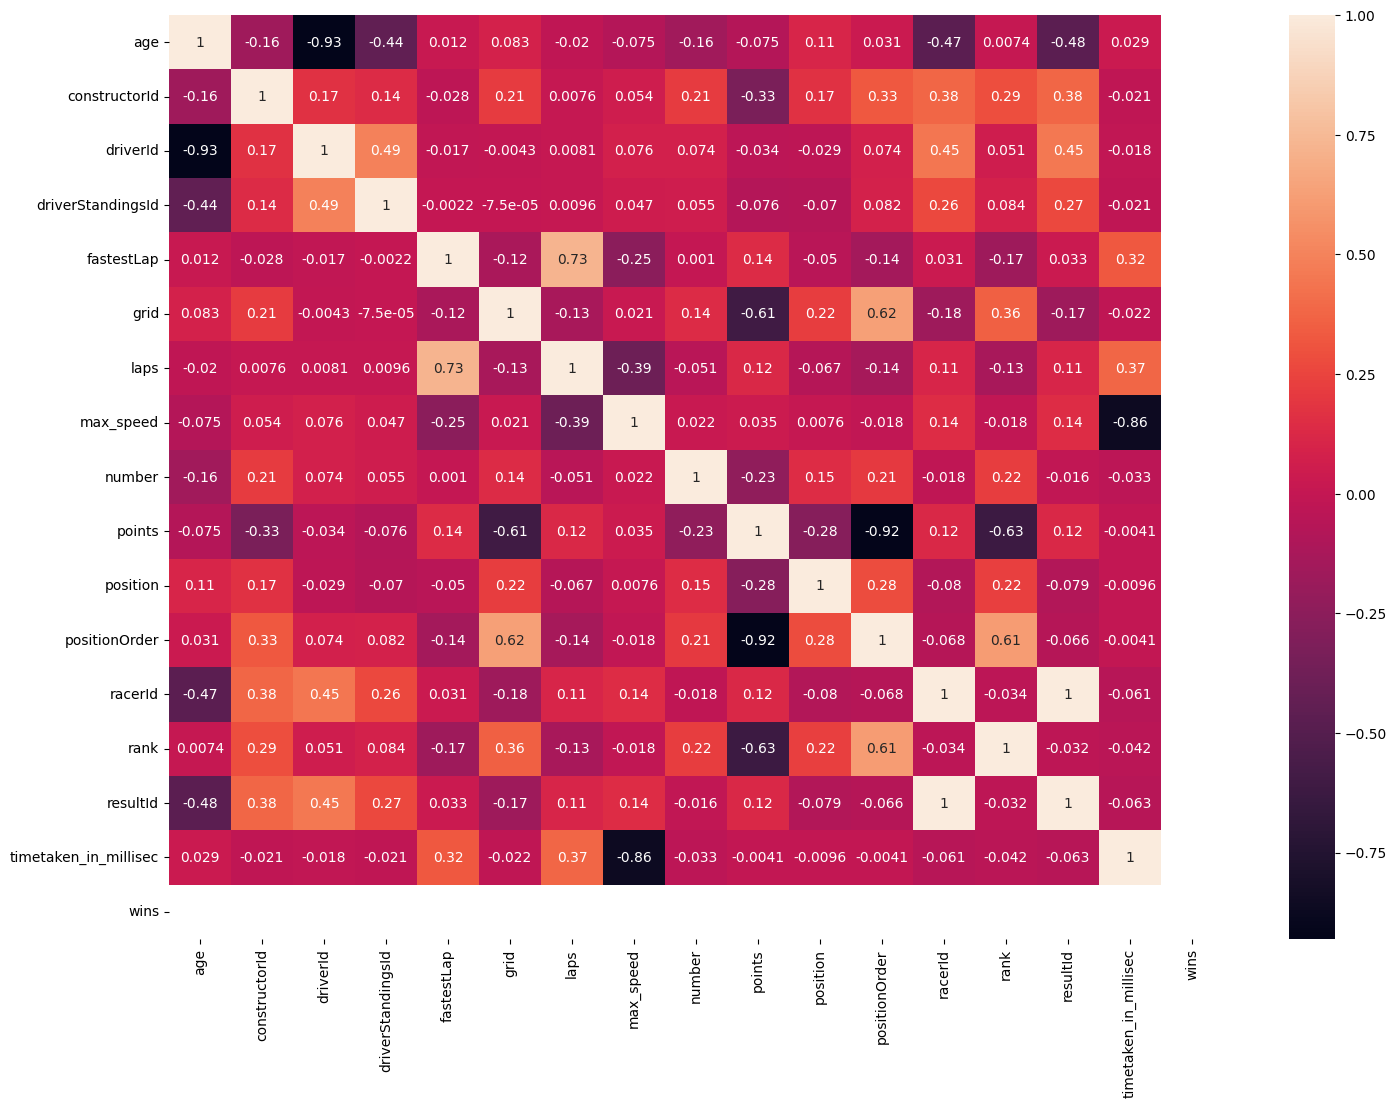

In [ ]:
# heatmap

plt.figure(figsize=(17,12))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True) # Select only numerical columns for correlation calculation
plt.show()

In [ ]:
num.remove('dob')
num.remove('statusId')

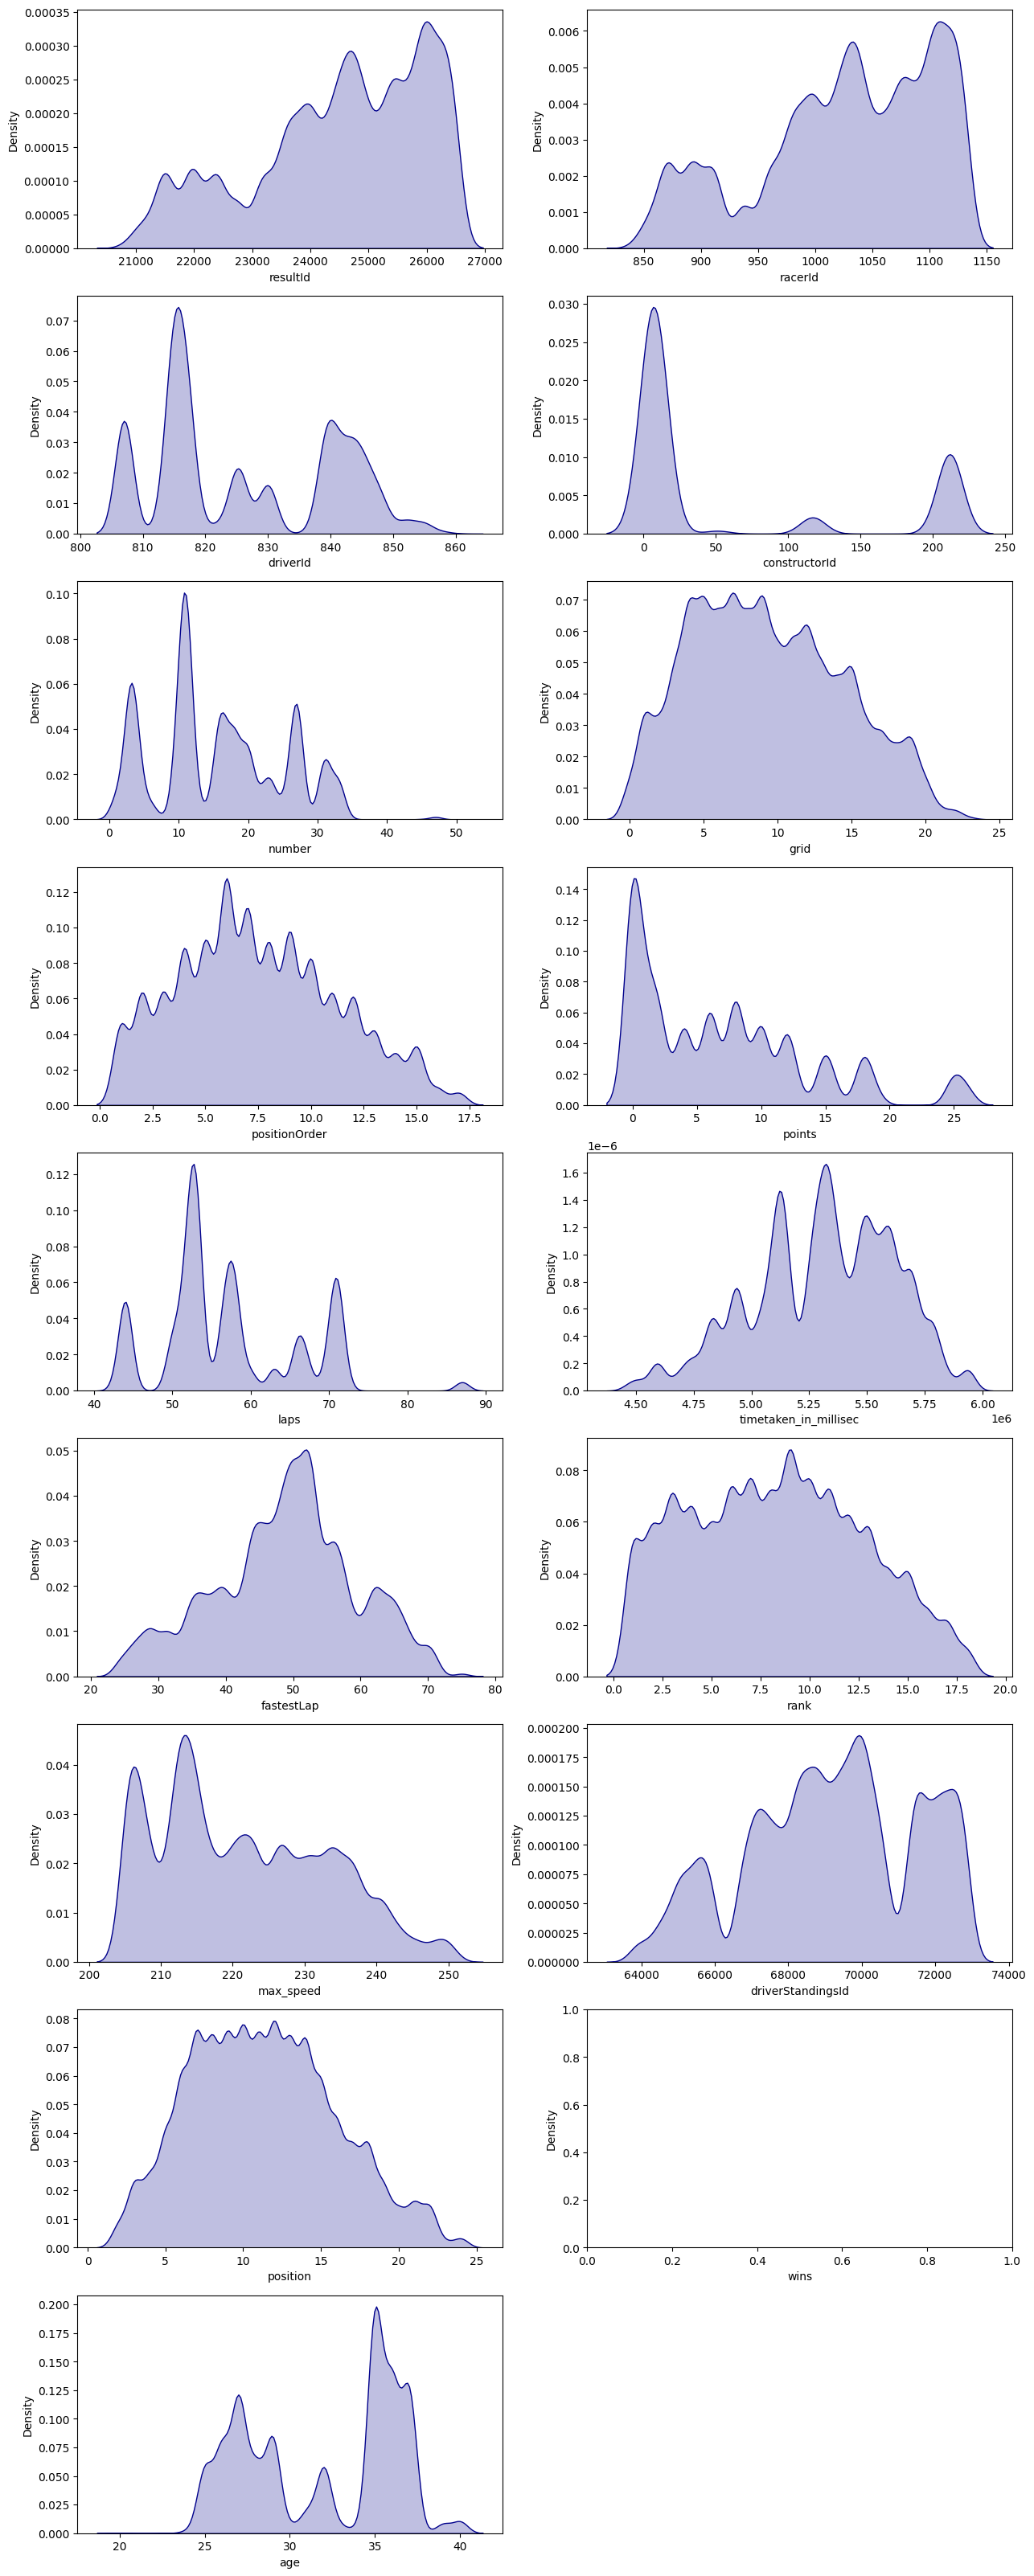

In [ ]:
# kde plot for checking the normalization

plt.figure(figsize=(15,50))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

In [ ]:
df.skew(numeric_only=True)

,0
age,-0.202288
constructorId,1.079810
driverId,0.272278
driverStandingsId,-0.245163
fastestLap,-0.177063
grid,0.284033
laps,0.657206
max_speed,0.406945
number,0.292629
points,0.993174


**Encoding**


I have choosen LabelEncoding instead of one hot encoding, because one hot will give you a various new columns based on the unique value. I will recommend LabelEncoding to use always, since it will replace in a single column for new value.

Note:

* To represent a unicode string as a string of bytes is known as encoding.
* To convert a string of bytes to a unicode string is known as decoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#encoding categorical columns

for i in cat:
  df[i] = le.fit_transform(df[i])
df.head()

,age,constructorId,driverId,driverStandingsId,driver_code,driver_name,fastestLap,grid,laps,max_speed,name,nationality,number,points,position,positionOrder,racerId,rank,resultId,status,timetaken_in_millisec,wins
2594452,40.0,4,808,63757,24,33,55.0,6,58,211.969,13,16,10.0,15.0,21,3,841,7.0,20781,0,5400819.0,0
2594453,40.0,4,808,63781,24,33,55.0,6,58,211.969,13,16,10.0,15.0,22,3,841,7.0,20781,0,5400819.0,0
2594454,40.0,4,808,63805,24,33,55.0,6,58,211.969,13,16,10.0,15.0,23,3,841,7.0,20781,0,5400819.0,0
2594455,40.0,4,808,63829,24,33,55.0,6,58,211.969,13,16,10.0,15.0,12,3,841,7.0,20781,0,5400819.0,0
2594456,40.0,4,808,63853,24,33,55.0,6,58,211.969,13,16,10.0,15.0,13,3,841,7.0,20781,0,5400819.0,0


In [ ]:
x = df.drop('driver_name',axis=1)
y = df.driver_name

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

**ML Algorithms**

In [ ]:
# importing ML libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=5,random_state=1234)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [ ]:
tree.export_text(clf)

'|--- feature_2 <= 815.50\n|   |--- feature_0 <= 36.00\n|   |   |--- class: 30\n|   |--- feature_0 >  36.00\n|   |   |--- feature_2 <= 807.50\n|   |   |   |--- class: 22\n|   |   |--- feature_2 >  807.50\n|   |   |   |--- feature_10 <= 10.00\n|   |   |   |   |--- class: 26\n|   |   |   |--- feature_10 >  10.00\n|   |   |   |   |--- feature_4 <= 20.50\n|   |   |   |   |   |--- class: 25\n|   |   |   |   |--- feature_4 >  20.50\n|   |   |   |   |   |--- class: 33\n|--- feature_2 >  815.50\n|   |--- feature_2 <= 817.50\n|   |   |--- feature_2 <= 816.50\n|   |   |   |--- class: 12\n|   |   |--- feature_2 >  816.50\n|   |   |   |--- class: 4\n|   |--- feature_2 >  817.50\n|   |   |--- feature_10 <= 5.50\n|   |   |   |--- feature_11 <= 15.00\n|   |   |   |   |--- feature_0 <= 27.50\n|   |   |   |   |   |--- class: 15\n|   |   |   |   |--- feature_0 >  27.50\n|   |   |   |   |   |--- class: 21\n|   |   |   |--- feature_11 >  15.00\n|   |   |   |   |--- feature_4 <= 25.50\n|   |   |   |   |   

In [ ]:
fn = list(df.columns)
fn.remove('driver_name')

**DT workflow**

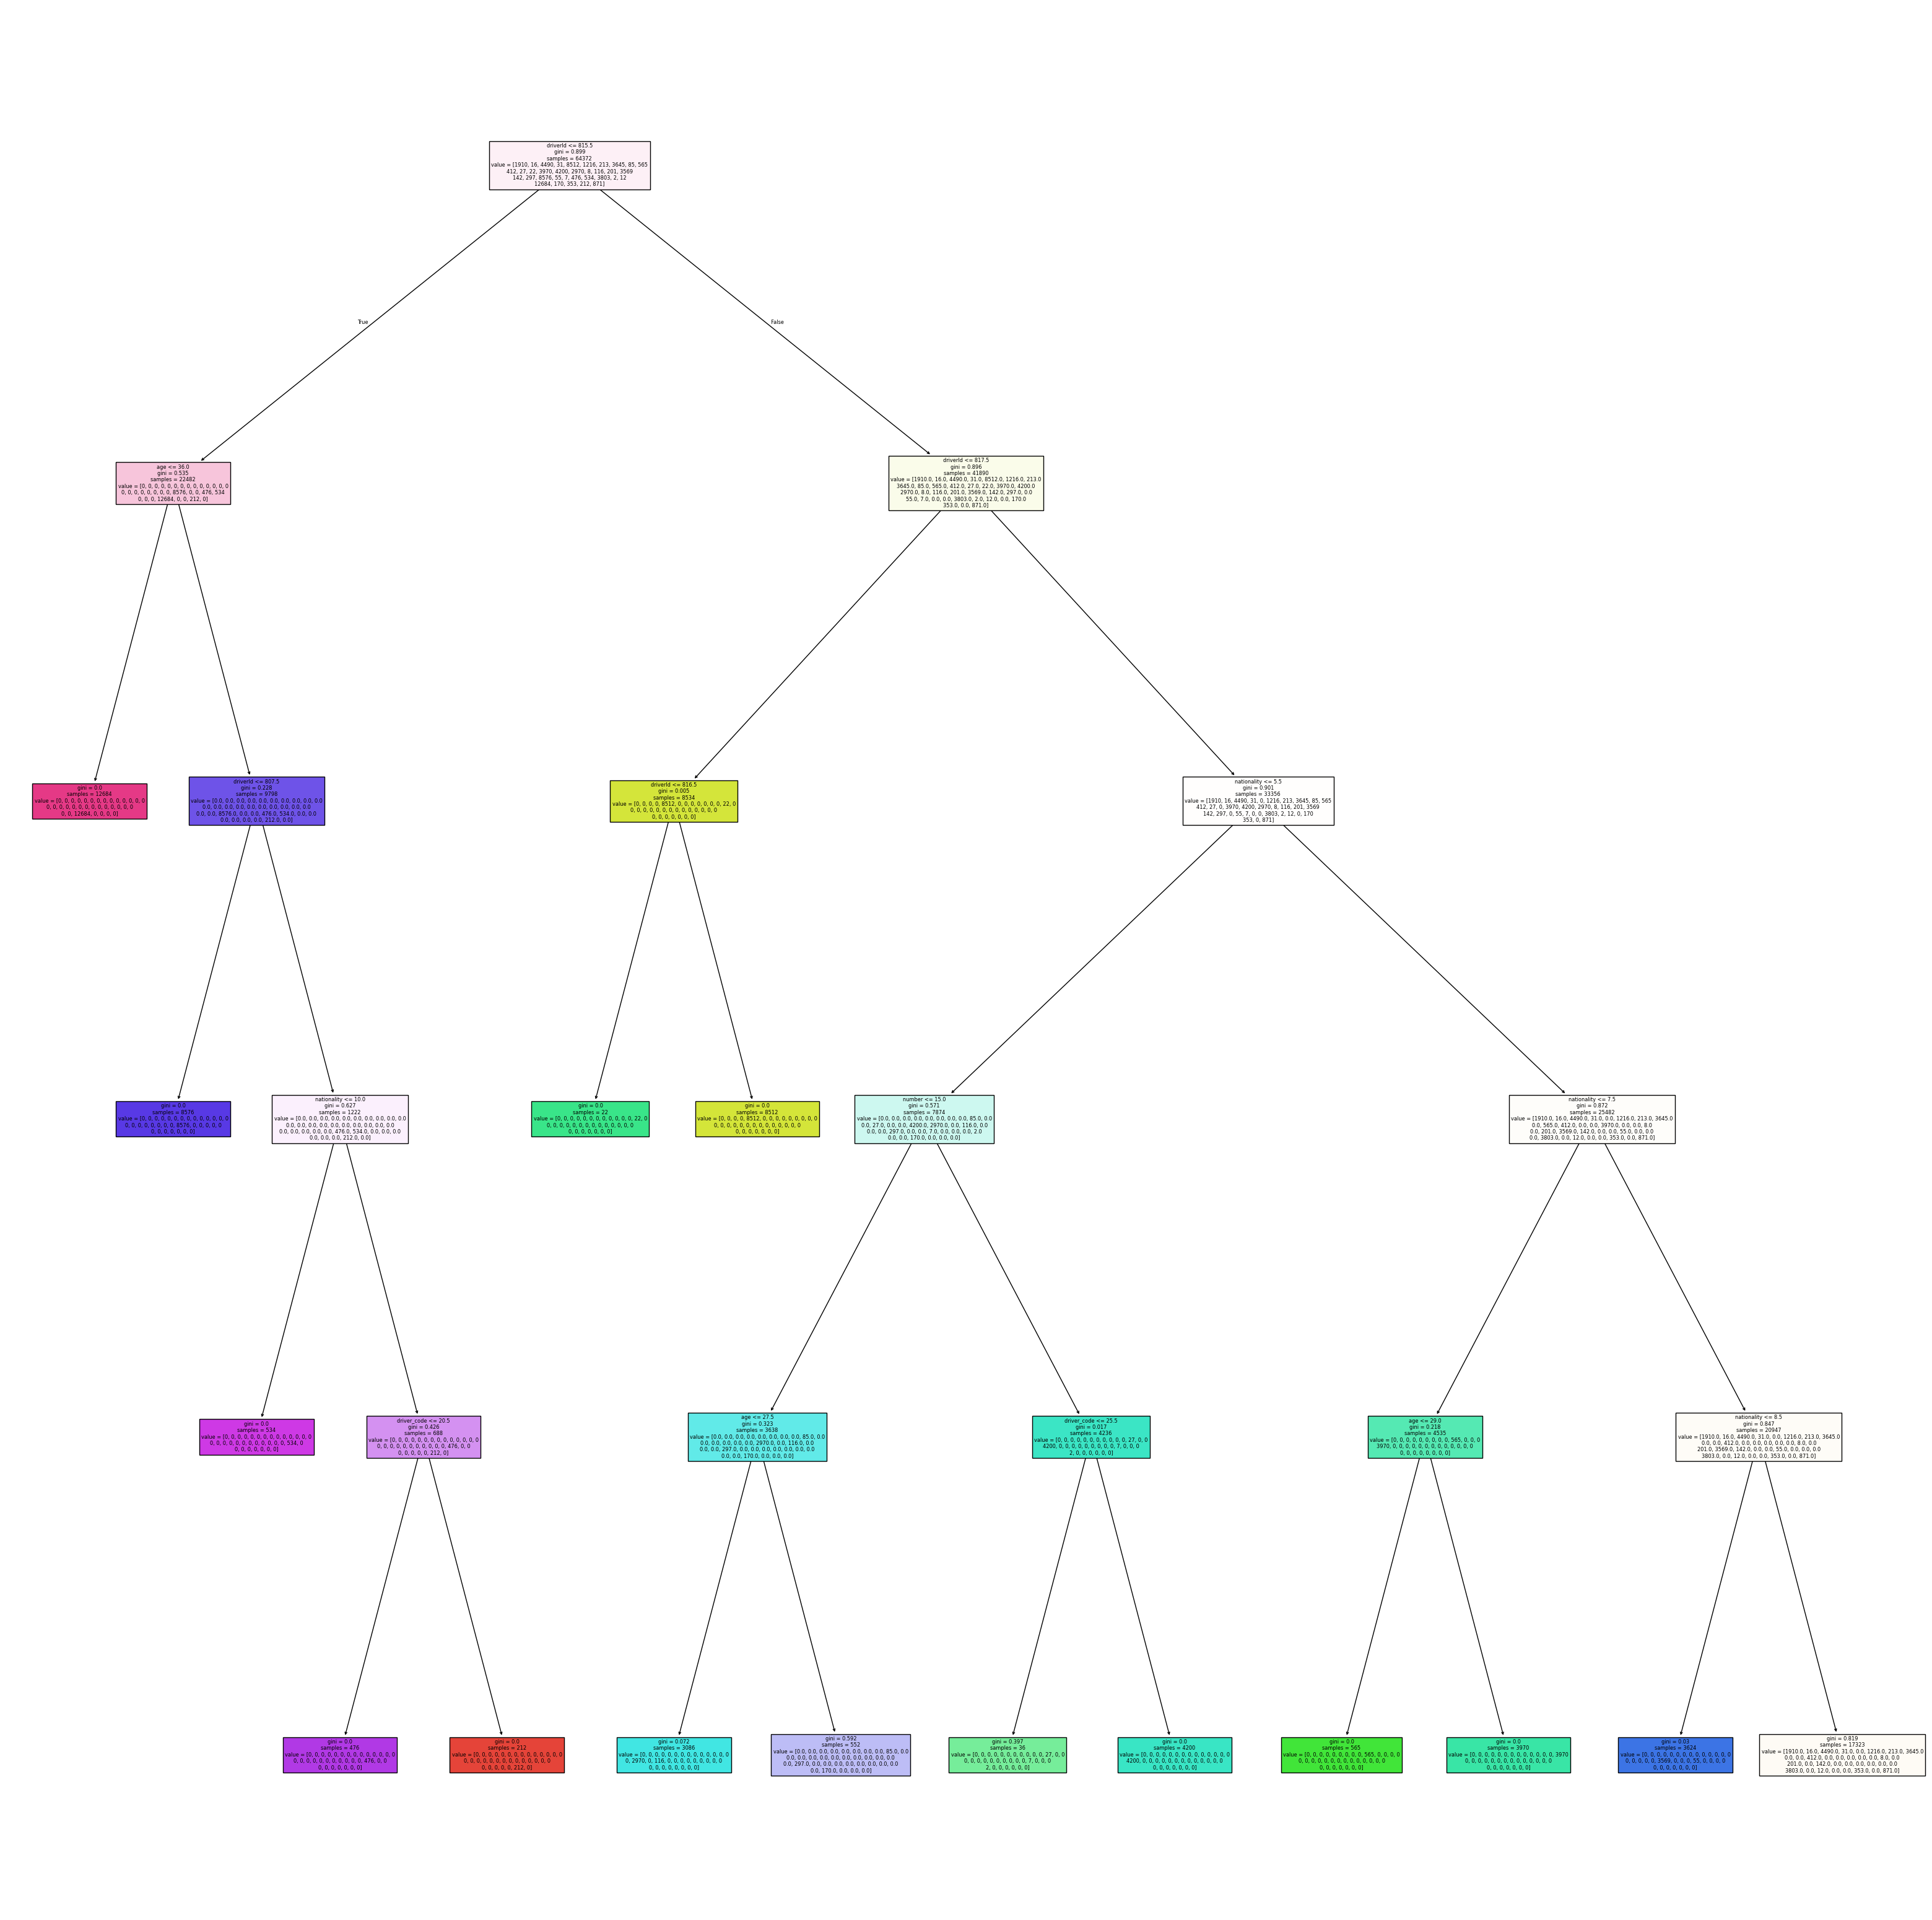

In [ ]:
# plotting decision tree workflow

fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf,
               feature_names=fn,
               filled=True)

**Modeling The Data**

In [ ]:
# classification ML algorithms

lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [ ]:
li = [lr,sgd,knn,gb,rn,dt]
d = {}
for i in li:
    i.fit(xtrain,ytrain)
    ypred = i.predict(xtest)
    print(i,":",accuracy_score(ypred,ytest)*100)
    d.update({str(i):i.score(xtest,ytest)*100})

LogisticRegression(solver='sag') : 19.624474409163405
SGDClassifier() : 6.825431346962447
KNeighborsClassifier() : 99.81876178048427
GaussianNB() : 80.90474119182252
RandomForestClassifier() : 100.0
DecisionTreeClassifier() : 100.0


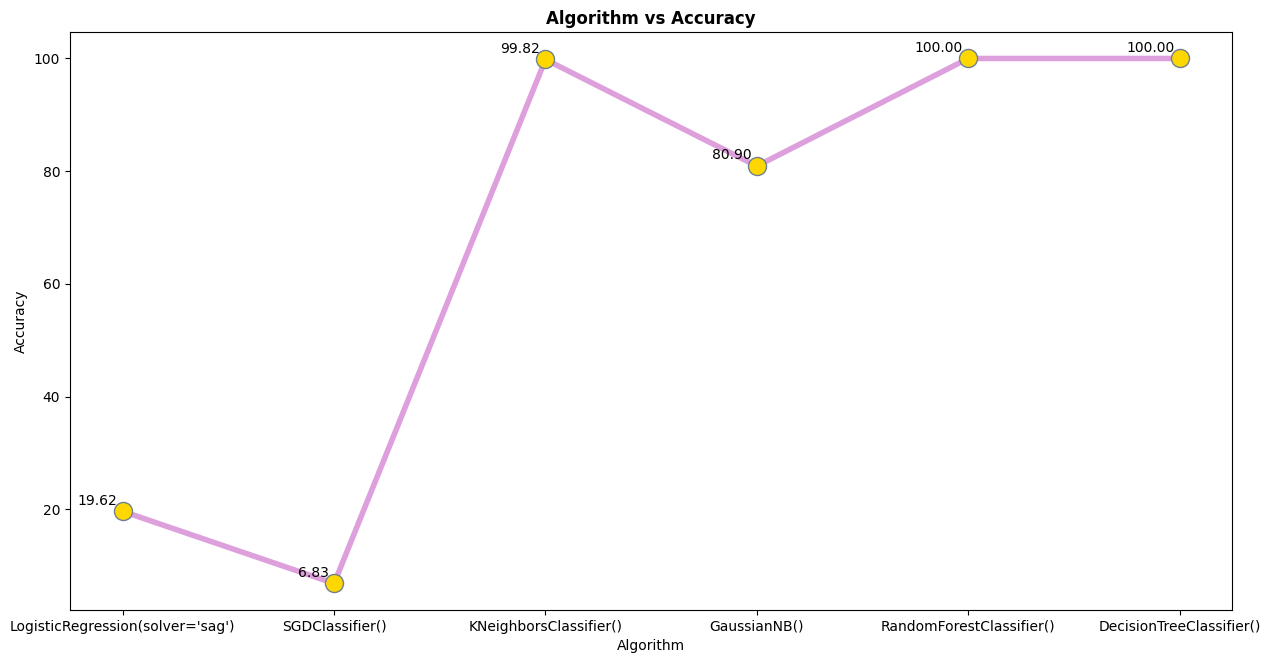

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='plum',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='slategray')
for x,y in zip(d.keys(),d.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

As you can see, the accuracy of basic algorithm (logistic) and SGD is not good as expected. Since the data are skewed/denormalized, so it can be fixed by scaling the data

**MinMaxScaler**

Each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
# transform training data
X_train_norm = norm.transform(xtrain)
# transform testing data
X_test_norm = norm.transform(xtest)

In [ ]:
li = [lr,sgd,rn,knn,gb,dt]
di = {}
for i in li:
    i.fit(X_train_norm,ytrain)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,ytest)*100)
    di.update({str(i):i.score(X_test_norm,ytest)*100})

LogisticRegression(solver='sag') : 99.96737712048717
SGDClassifier() : 97.75627084239524
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


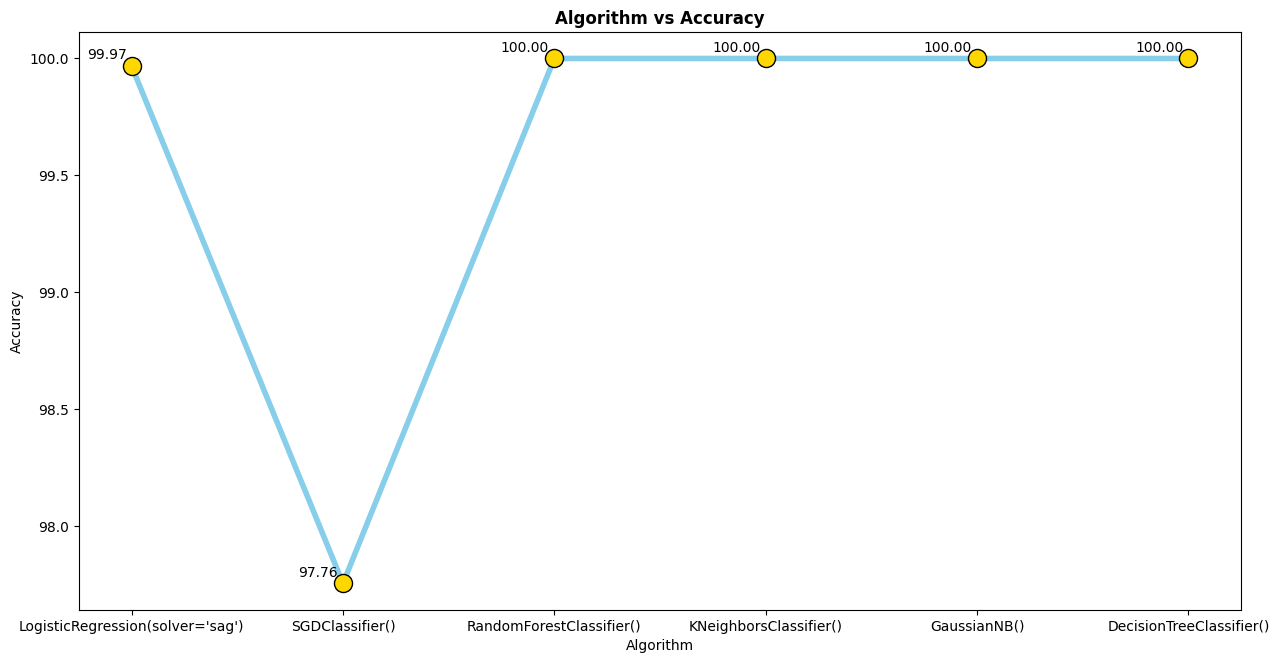

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(di.keys(),di.values(),marker='o',color='skyblue',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(di.keys(),di.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

As you can see the accuracy are getting high for Logistic Regression and SGDClassifier, both the algorithms are performing well from bottom low to 99% accuracy by scaling. Hence this prove the importance of normalizing the data.

**StandardScaler**

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [ ]:
from sklearn.preprocessing import StandardScaler
# fit scaler on training data
std = StandardScaler().fit(xtrain)
# transform train data
x_train_std = std.transform(xtrain)
# transform test data
x_test_std = std.transform(xtest)

In [ ]:
li = [lr,sgd,rn,knn,gb,dt]
dic = {}
for i in li:
    i.fit(x_train_std,ytrain)
    ypred = i.predict(x_test_std)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dic.update({str(i):i.score(x_test_std,ytest)*100})

LogisticRegression(solver='sag') : 100.0
SGDClassifier() : 99.11918225315355
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


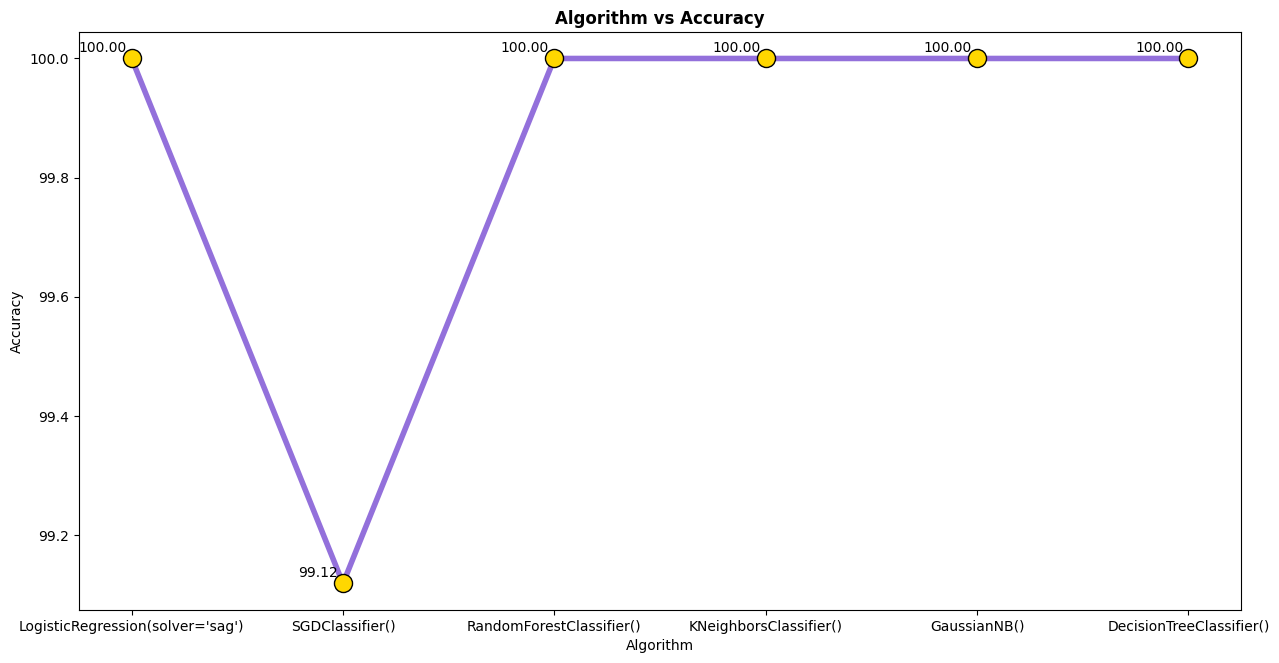

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dic.keys(),dic.values(),marker='o',color='mediumpurple',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(dic.keys(),dic.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

**RobustScaler**

Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

In [ ]:
from sklearn.preprocessing import RobustScaler
# fit scaler on train data
scaler = RobustScaler().fit(xtrain)
# transform train data
xtrain_scaled = scaler.transform(xtrain)
# transform test data
xtest_scaled = scaler.transform(xtest)

In [ ]:
li = [lr,sgd,rn,knn,gb,dt]
dics = {}
for i in li:
    i.fit(xtrain_scaled,ytrain)
    ypred = i.predict(xtest_scaled)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dics.update({str(i):i.score(xtest_scaled,ytest)*100})

LogisticRegression(solver='sag') : 100.0
SGDClassifier() : 99.09018413803102
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 100.0
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


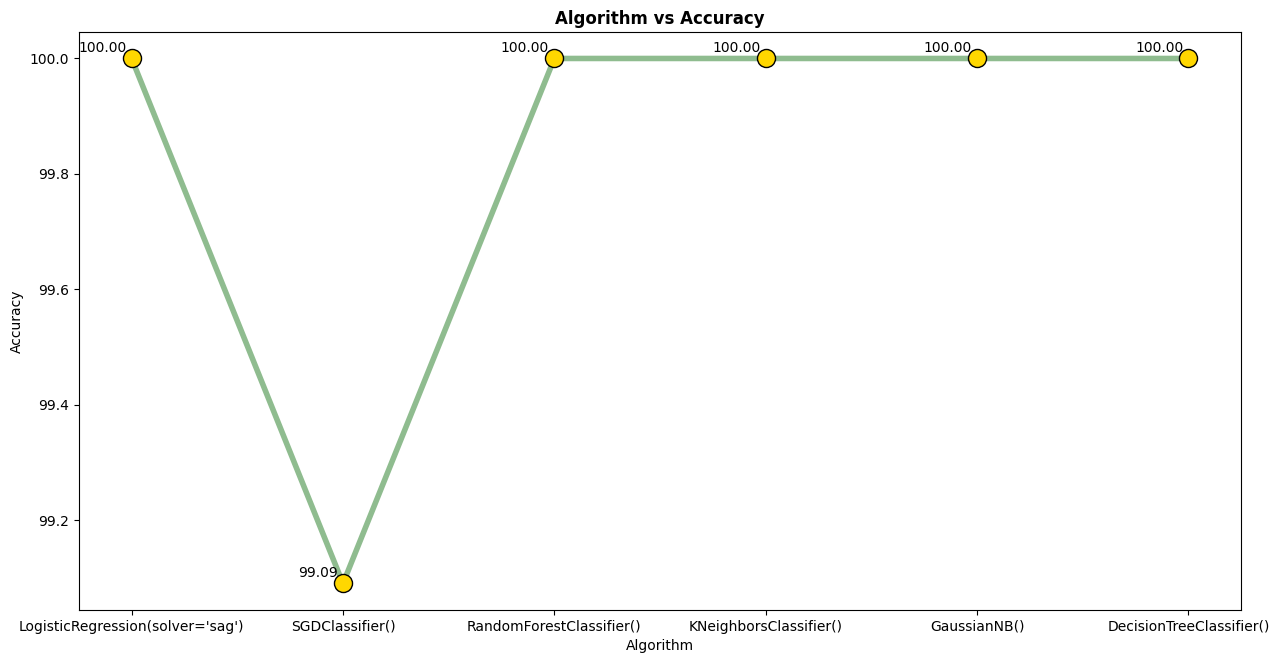

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dics.keys(),dics.values(),marker='o',color='darkseagreen',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(dics.keys(),dics.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

**`THANK YOU !!!`**

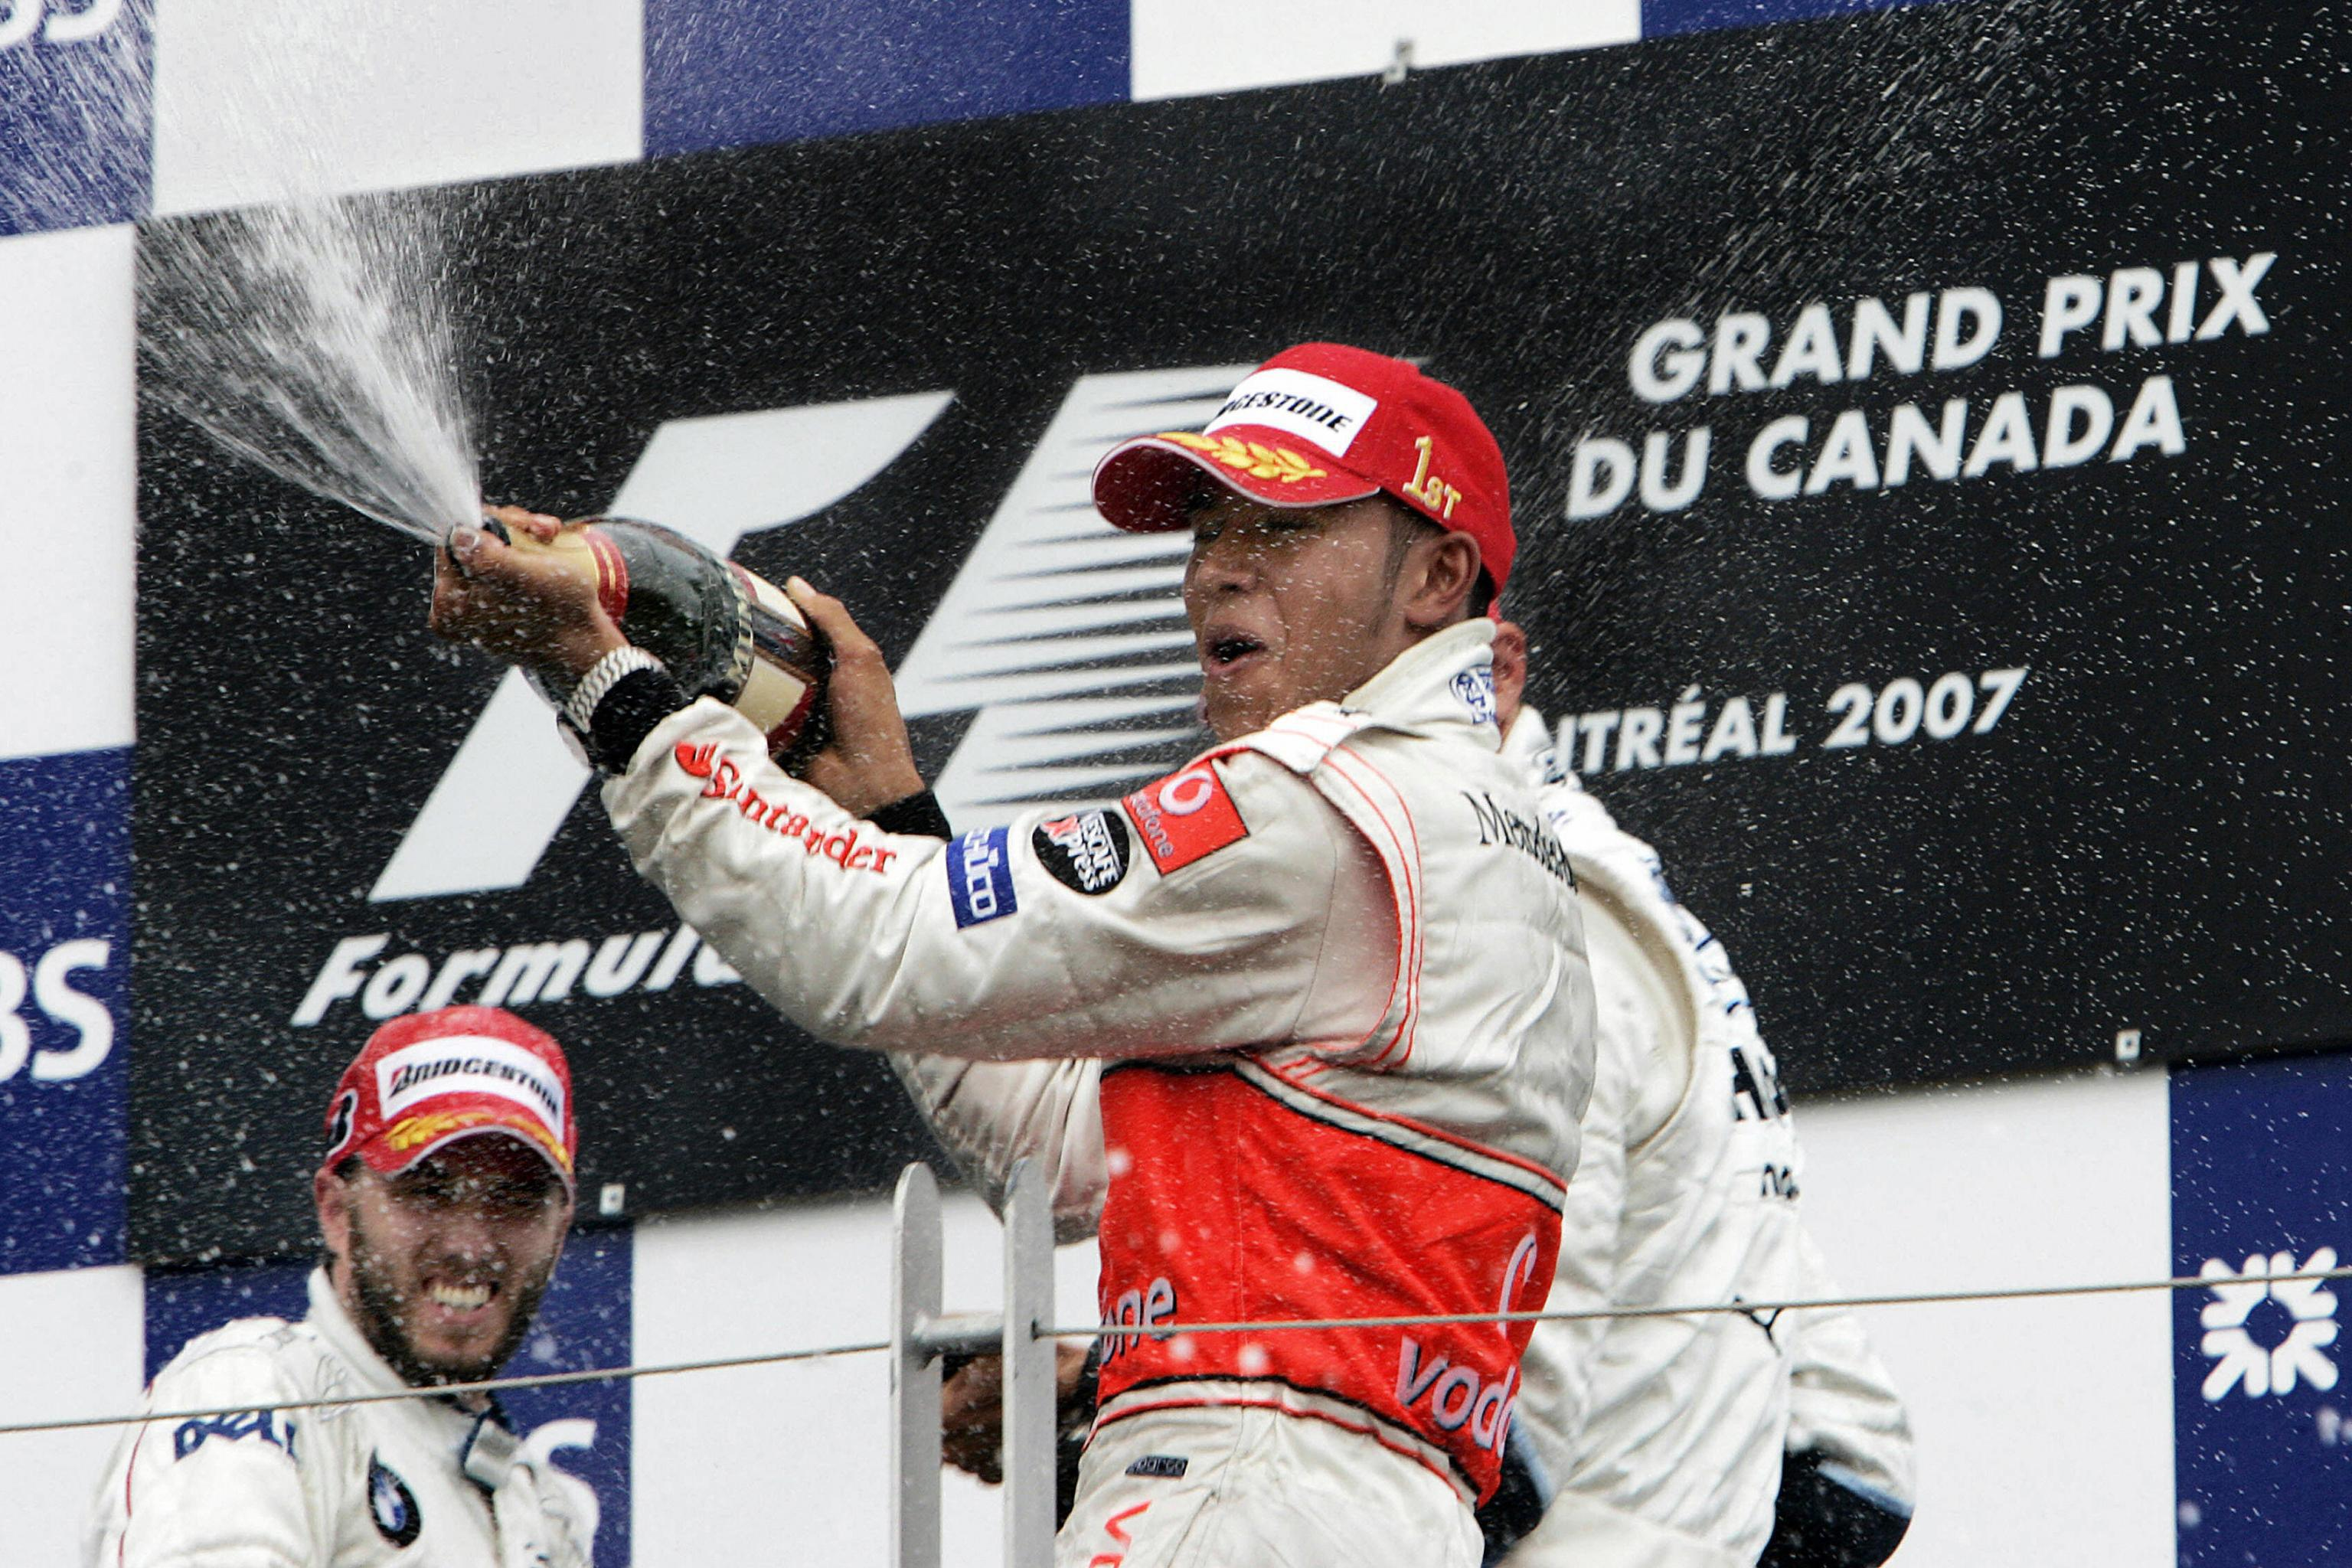